# [1] 표준화 프로세스

In [2]:
import os 
from os.path import join
import copy
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

In [48]:
df = pd.read_excel('19년 평균 합본_유동,직장,집객,상주,점포_최종.xlsx')
df.shape

(1448, 7)

In [49]:
df = df.drop(columns = ['Unnamed: 0'])
df.head(1)

,상권코드명,유동인구,직장인구,집객시설,상주인구,점포수
0,가로공원로58길,458550.0,97.25,4,2349,58.0


In [8]:
df.describe()

,유동인구,직장인구,집객시설,상주인구,점포수
count,1.448000e+03,1448.000000,1448.000000,1448.000000,1448.000000
mean,6.545517e+05,1669.648884,19.069061,2017.754144,267.612396
std,5.164341e+05,5680.883089,30.903612,1436.730915,532.944441
min,1.283575e+04,5.333333,1.000000,1.000000,4.000000
25%,3.383422e+05,149.375000,7.000000,859.250000,117.500000
50%,5.585785e+05,336.750000,12.000000,1865.500000,169.750000
75%,8.549784e+05,994.812500,20.000000,2932.750000,247.562500
max,6.378409e+06,136724.750000,593.000000,10755.000000,13428.750000


In [ ]:
# 표준화를 할 때, string값이 들어가있는 컬럼이 있으면 에러가 남
# 그래서 숫자로 되어있는 각 변수들만 가져옴!

In [36]:
df1 = df[['유동인구', '직장인구', '집객시설', '상주인구', '점포수']]
df1.head(1)

,유동인구,직장인구,집객시설,상주인구,점포수
0,458550.0,97.25,4,2349,58.0


# Min-Max 스케일링

In [20]:
from sklearn.preprocessing import MinMaxScaler

mMscaler = MinMaxScaler()

#### 회귀분석을 할 때처럼 fit을 먼저해주고 transform을 해줘야함
* fit_transform을 해주면 위 두 과정을 한번에 해줄 수 있다

In [28]:
normal = mMscaler.fit_transform(df1) # transform부터가 0-1으로 바꾸는 것
normal = pd.DataFrame(normal, columns = df1.columns)
normal

,유동인구,직장인구,집객시설,상주인구,점포수
0,0.070020,0.000672,0.005068,0.218337,0.004022
1,0.096410,0.001285,0.013514,0.299423,0.008846
2,0.088230,0.002336,0.005068,0.267807,0.009721
3,0.023396,0.000029,0.001689,0.023712,0.008026
4,0.117148,0.000455,0.006757,0.177701,0.008119
...,...,...,...,...,...
1443,0.092498,0.001000,0.030405,0.121164,0.021621
1444,0.116312,0.001104,0.025338,0.241399,0.014097
1445,0.074049,0.000519,0.016892,0.060815,0.006183
1446,0.104895,0.000689,0.008446,0.188674,0.011080


In [37]:
normal.describe()

,유동인구,직장인구,집객시설,상주인구,점포수
count,1448.000000,1448.000000,1448.000000,1448.000000,1448.000000
mean,0.100810,0.012173,0.030522,0.187535,0.019636
std,0.081129,0.041551,0.052202,0.133600,0.039699
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.051135,0.001054,0.010135,0.079808,0.008455
50%,0.085733,0.002424,0.018581,0.173377,0.012347
75%,0.132296,0.007237,0.032095,0.272619,0.018143
max,1.000000,1.000000,1.000000,1.000000,1.000000


# 정규분포로 scaling하기

In [38]:
from sklearn.preprocessing import StandardScaler
sdscaler = StandardScaler()

In [39]:
sdscaler.fit(df1)

StandardScaler()

In [40]:
normal2 = sdscaler.transform(df1)

In [43]:
normal2 = pd.DataFrame(normal2, columns = df1.columns)
normal2

,유동인구,직장인구,집객시설,상주인구,점포수
0,-0.379660,-0.276883,-0.487783,0.230635,-0.393446
1,-0.054264,-0.262136,-0.325934,0.837778,-0.271909
2,-0.155122,-0.236823,-0.487783,0.601048,-0.249854
3,-0.954543,-0.292365,-0.552523,-1.226648,-0.292556
4,0.201444,-0.282122,-0.455413,-0.073633,-0.290210
...,...,...,...,...,...
1443,-0.102489,-0.269003,-0.002235,-0.496962,0.049999
1444,0.191144,-0.266494,-0.099345,0.403309,-0.139579
1445,-0.329975,-0.280581,-0.261194,-0.948838,-0.339012
1446,0.050364,-0.276487,-0.423044,0.008526,-0.215599


In [53]:
normal2 = normal2.reset_index()
normal2.head(1)

,level_0,index,유동인구,직장인구,집객시설,상주인구,점포수
0,0,0,-0.37966,-0.276883,-0.487783,0.230635,-0.393446


# 정규분포 스케일링+상권명 합치기

In [50]:
df2 = df[['상권코드명']]
df2.head(1)

,상권코드명
0,가로공원로58길


In [54]:
df2 = df2.reset_index()
df2.head()

,index,상권코드명
0,0,가로공원로58길
1,1,가로공원로76가길
2,2,가로공원로80길
3,3,가리봉시장
4,4,가마산로61길


In [56]:
normal_dist = pd.merge(df2, normal2, how = 'inner', on ='index')
normal_dist

,index,상권코드명,level_0,유동인구,직장인구,집객시설,상주인구,점포수
0,0,가로공원로58길,0,-0.379660,-0.276883,-0.487783,0.230635,-0.393446
1,1,가로공원로76가길,1,-0.054264,-0.262136,-0.325934,0.837778,-0.271909
2,2,가로공원로80길,2,-0.155122,-0.236823,-0.487783,0.601048,-0.249854
3,3,가리봉시장,3,-0.954543,-0.292365,-0.552523,-1.226648,-0.292556
4,4,가마산로61길,4,0.201444,-0.282122,-0.455413,-0.073633,-0.290210
...,...,...,...,...,...,...,...,...
1443,1443,휘경로2길,1443,-0.102489,-0.269003,-0.002235,-0.496962,0.049999
1444,1444,휘경로3길,1444,0.191144,-0.266494,-0.099345,0.403309,-0.139579
1445,1445,흑석로13길,1445,-0.329975,-0.280581,-0.261194,-0.948838,-0.339012
1446,1446,흑석로9길,1446,0.050364,-0.276487,-0.423044,0.008526,-0.215599


In [59]:
del normal_dist['index']

In [60]:
del normal_dist['level_0']

In [66]:
normal_dist.head(1)
normal_dist.shape

(1448, 6)

In [62]:
normal_dist.to_excel('정규분포_표준화_유동,직장,집객,상주,점포.xlsx')

# 클러스터링 시도!
* K-means는 군집별 평균을 활용한다
* 실루엣은 evaluation metrics

In [67]:
normal_dist.shape

(1448, 6)

In [69]:
normal_dist.describe()

,유동인구,직장인구,집객시설,상주인구,점포수
count,1.448000e+03,1.448000e+03,1.448000e+03,1.448000e+03,1.448000e+03
mean,-5.175418e-17,-7.628950e-18,-6.302509e-17,-5.995818e-17,-2.813415e-17
std,1.000345e+00,1.000345e+00,1.000345e+00,1.000345e+00,1.000345e+00
min,-1.243020e+00,-2.930690e-01,-5.848929e-01,-1.404195e+00,-4.948048e-01
25%,-6.125054e-01,-2.677047e-01,-3.906738e-01,-8.066259e-01,-2.817634e-01
50%,-1.859024e-01,-2.347099e-01,-2.288245e-01,-1.060092e-01,-1.836893e-01
75%,3.882314e-01,-1.188318e-01,3.013437e-02,6.370796e-01,-3.763399e-02
max,1.108725e+01,2.378182e+01,1.857806e+01,6.083439e+00,2.470367e+01


#### 5개 컬럼으로 이루어진 벡터는 우리가 눈으로 보기 어렵다. 따라서 2차원으로 변환해주는 과정 (=차원축소)이 필요한데 그게 바로 PCA. 
* 문제는 여기서 상권명이 들어가있어서 자꾸 오류가 난다. 그래서 normal2인 표준화한 raw값만 들어있는 df을 활용해줬음

In [75]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
data = pca.fit_transform(normal2)

In [76]:
data.shape

(1448, 2)

#### k-means++이 뭔지 알아봐야함

In [89]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3)

In [90]:
kmeans.fit(data) #학습완료

KMeans(n_clusters=3)

In [108]:
cluster = kmeans.predict(data)# 각 클러스터 번호를 반환해줌
df_cl = pd.DataFrame(cluster, columns =['cluster'])
df_cl.reset_index()
df_cl.head()

,cluster
0,1
1,1
2,1
3,1
4,1


In [116]:
clustering= clustering.drop(columns = ['index'])

In [120]:
clustering = pd.concat([df_cl, df2], axis = 1)
clustering.tail(1)
clustering = clustering.drop(columns= ['index'])

In [125]:
clustering = pd.merge(clustering, df, how ='inner', on = '상권코드명')
clustering.head(1)

,cluster,상권코드명,유동인구,직장인구,집객시설,상주인구,점포수
0,1,가로공원로58길,458550.0,97.25,4,2349,58.0


In [131]:
clustering.to_excel('클러스터링 첫 시도.xlsx')

#### 얘야 이게 무슨일이니..ㅠㅠ 왜 이렇게 나와 ㅠㅠ

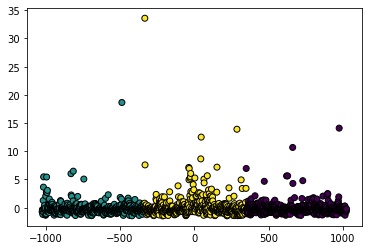

In [99]:
plt.scatter(data[:,0], data[:, 1], c=cluster, linewidth=1, edgecolor='black')
plt.show()